# Linear Regression

1.Linear Regression can be used to forecast price by analyzing actual price given in the house price dataset.

2.The objective of a linear regression model is to find a relationship between one or more independent variables and   a continuous target variabl(dependent variable)

In [64]:
#import all the libraries:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#import dataset
mydata = pd.read_csv("House_Price.csv")

In [66]:
mydata

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1,1180,5650,1,221900
1,3,2,2570,7242,2,538000
2,2,1,770,10000,1,180000
3,4,3,1960,5000,1,604000
4,3,2,1680,8080,1,510000
...,...,...,...,...,...,...
21608,3,3,1530,1131,3,360000
21609,4,3,2310,5813,2,400000
21610,2,1,1020,1350,2,402101
21611,3,3,1600,2388,2,400000


In [67]:
mydata.info() # dependent = price 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bedrooms     21613 non-null  int64
 1   bathrooms    21613 non-null  int64
 2   sqft_living  21613 non-null  int64
 3   sqft_lot     21613 non-null  int64
 4   floors       21613 non-null  int64
 5   price        21613 non-null  int64
dtypes: int64(6)
memory usage: 1013.2 KB


In [68]:
mydata.describe() # it will show all the statistical value for the house price dataset

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04
mean,3.370842,2.312543,2079.899736,1.510697e+04,1.542405,5.400881e+05
std,0.930062,0.865405,918.440897,4.142051e+04,0.567504,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,7.500000e+04
25%,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,3.219500e+05
50%,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,4.500000e+05
75%,4.000000,3.000000,2550.000000,1.068800e+04,2.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,7.700000e+06


In [69]:
mydata.isnull().sum()# to check the null values in the dataset

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
price          0
dtype: int64

## Correlation 
Finding the relationship between 2 variables.

In [70]:
mydata_corr = mydata.corr()

In [71]:
mydata_corr # if correlation value > 0.5 then that variable has a good correlation with dependent variable.
# here sqft_living is 0.7020 > 0.5 it has good correlation

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
bedrooms,1.000000,0.492322,0.576671,0.031703,0.182485,0.308350
bathrooms,0.492322,1.000000,0.719901,0.077230,0.453929,0.475331
sqft_living,0.576671,0.719901,1.000000,0.172826,0.329975,0.702035
sqft_lot,0.031703,0.077230,0.172826,1.000000,-0.001193,0.089661
floors,0.182485,0.453929,0.329975,-0.001193,1.000000,0.258001
price,0.308350,0.475331,0.702035,0.089661,0.258001,1.000000


### Graph to visualize the correlation.

### Heat map 

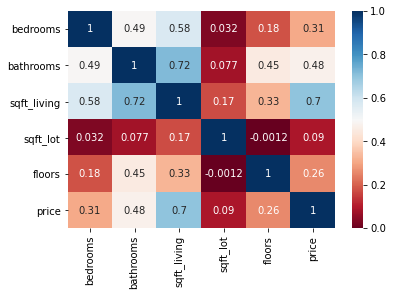

In [72]:
sns.heatmap(mydata_corr, annot = True, cmap = 'RdBu'); # blue = good correlation, red = bad correlation

### Pairplot

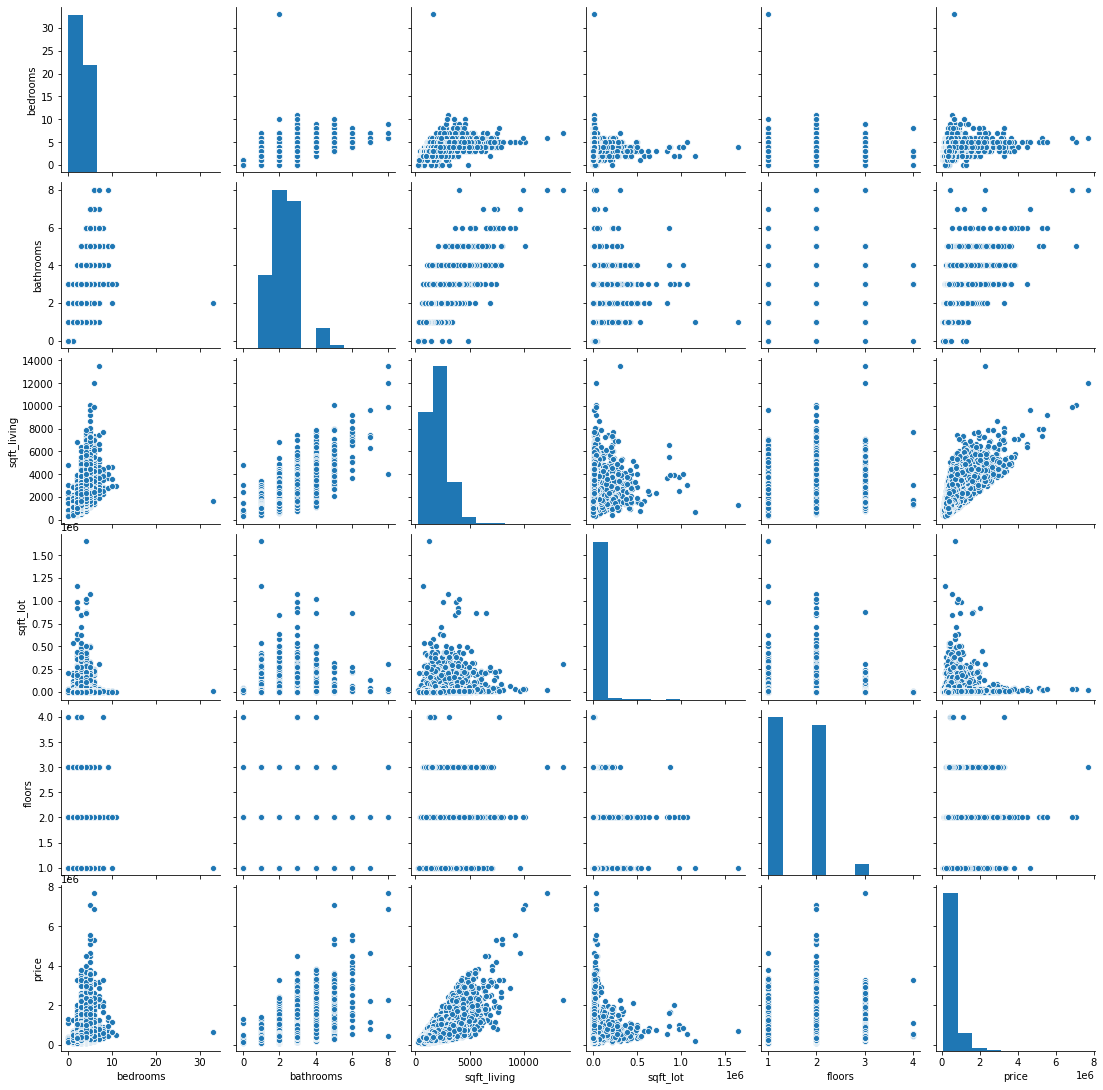

In [73]:
sns.pairplot(mydata)  # is shows the linear relationship between variables.

### Boxplot

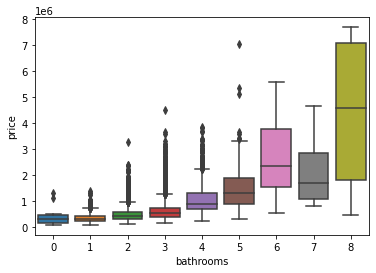

In [74]:
sns.boxplot(x = "bathrooms",y = "price", data = mydata) # used to find the outlier. used for categorical variable.

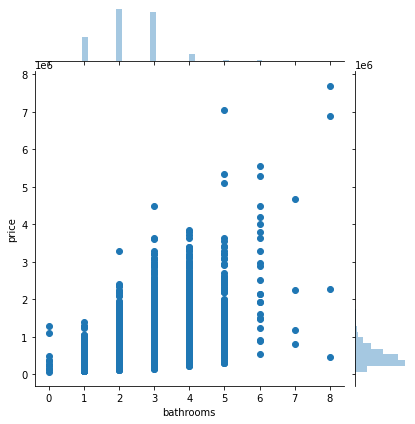

In [75]:
sns.jointplot(x="bathrooms",y='price',data=mydata); # Marginal histogram 

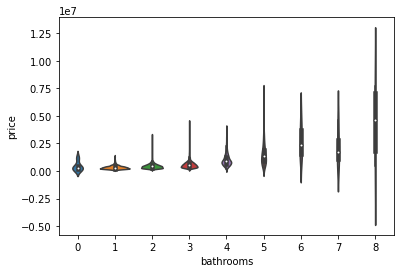

In [76]:
sns.violinplot(x="bathrooms",y='price',data=mydata);

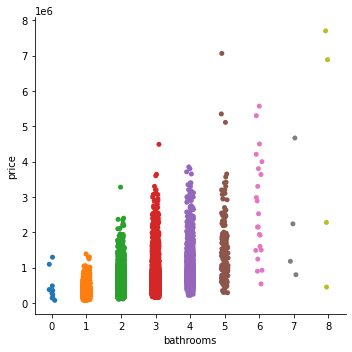

In [77]:
sns.catplot(x='bathrooms',y='price',data=mydata);

### Scatterplot

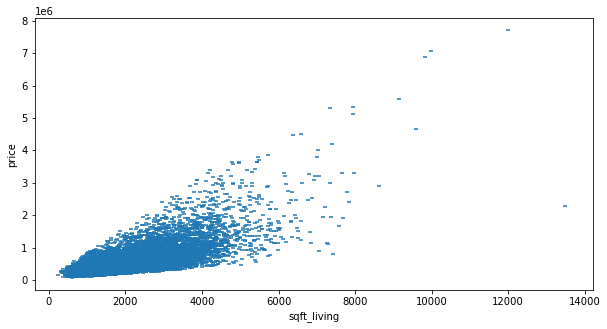

In [78]:
mydata.plot.scatter(x = "sqft_living", y = "price", marker = 0, figsize = (10,5)) # the graph shows that sqft_living increses the price of house will increase.

###  Dependent  variable 

In [79]:
y_dep = mydata.price # dependent variable
y_dep

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

### Independent variable

In [80]:
x_indep = mydata.drop("price", axis =1) # independent variable
x_indep

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,3,1,1180,5650,1
1,3,2,2570,7242,2
2,2,1,770,10000,1
3,4,3,1960,5000,1
4,3,2,1680,8080,1
...,...,...,...,...,...
21608,3,3,1530,1131,3
21609,4,3,2310,5813,2
21610,2,1,1020,1350,2
21611,3,3,1600,2388,2


### Ordinary Least square to calculate Linear Regression

In [97]:
import statsmodels.api as sm

In [98]:
model = sm.OLS(y_dep, x_indep )# using sm.Ols 

In [99]:
model 

In [100]:
my_fit = model.fit() # fit the model means how best the linear line(mean) fit the data values.

In [101]:
my_fit.summary() # It is gives the summary report for the model.Check (R)ˆ2 value if R squared > 0.5 it has good fit 
                 # to the model. R squared is correlation square.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                          2.352e+04
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                        0.00
Time:                        08:31:42   Log-Likelihood:                     -2.9992e+05
No. Observations:               21613   AIC:                                  5.999e+05
Df Residuals:                   21608   BIC:                                  5.999e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -4.195e+04   1798.147    -23.329      0.000   -4.55e+04   -3.84e+04
bathrooms   -2.337e+04   3106.713     -7.524      0.000   -2.95e+04   -1.73e+04
sqft_living   324.7097      2.975    109.141      0.000     318.878     330.541
sqft_lot       -0.3486      0.043     -8.103      0.000      -0.433      -0.264
floors       4.002e+04   3138.743     12.750      0.000    3.39e+04    4.62e+04
==============================================================================
Omnibus:                    13945.067   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457933.849
Skew:                           2.609   Prob(JB):                         0.00
Kurtosis:                      24.938   Cond. No.                     9.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Our R squared value is 0.8 > 0.5 . So we have good correlation between sqft_living and price. We have good fit model.

### Machine Learning

### Train and Test model
    Training of the model here means to find the parameters so that the model best fits the data.

 1. we are going to check how our created model  is accurate to determine price by using Train and test method.
 2. By Splitting 80% of dataset to train and 20 % dataset to test our model.

80% of independent is x train,
20% of independent is x test,
80% of dependent is y train,
20% of dependent is y test




In [102]:
import sklearn #  -scikit learn lib used for machine learning in python

In [103]:
from sklearn.model_selection import train_test_split # test_train_split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x_indep ,y_dep,train_size =0.8,random_state = 1) # we are splitting 80% dataset to train the data

In [107]:
x_train,x_test,y_train,y_test

(       bedrooms  bathrooms  sqft_living  sqft_lot  floors
 7291          3          2         2190      7021       1
 14835         3          3         2370      6840       2
 15880         2          1         1230      3800       1
 8812          4          2         2510      9963       1
 17220         3          1         1160      7491       1
 ...         ...        ...          ...       ...     ...
 10955         3          3         1920      3867       2
 17289         4          5         3420      7440       3
 5192          3          2         1970     54450       1
 12172         3          2         1980      8775       1
 235           5          4         3760     28040       2
 
 [17290 rows x 5 columns],
        bedrooms  bathrooms  sqft_living  sqft_lot  floors
 15544         4          3         2790      6600       2
 17454         3          2         1630      6449       1
 21548         2          2         2370    184231       2
 3427          4          3

### Building Model:

In [108]:
from sklearn import linear_model # we are importing linear_model to build the linear model

In [109]:
from sklearn.linear_model import LinearRegression

In [120]:
model=linear_model.LinearRegression()


In [121]:
model.fit(x_train,y_train)# finding best fit line for  train dataset 

LinearRegression()

In [122]:
y_pred=model.predict(x_test) # now calculating our predicted value for  test  data for price

In [123]:
y_pred

array([ 731166.67967974,  409898.60570831,  669252.27860429, ...,
        478178.67569015, 1472510.04262538,  363850.457691  ])

#### Build a Dataframe  by only displaying actual and predicted value of price 

In [132]:
df_price = pd.DataFrame({'Actual_price':y_test,'predicted_price': y_pred}) # create a dataframe using the actual and predicted price

In [133]:
df_price

,Actual_price,predicted_price
15544,459000,7.311667e+05
17454,445000,4.098986e+05
21548,1057000,6.692523e+05
3427,732350,5.637444e+05
8809,235000,4.046212e+05
...,...,...
13597,965000,9.325628e+05
9648,359950,5.967553e+05
18627,260000,4.781787e+05
9553,1795000,1.472510e+06


# Residual : 
   Finding error by subtracting predicted_price and Actual_price

In [134]:
Res=y_pred-y_test# we ll get residual by subtracting the predicted value by actual value. it ll give the error.
Res

15544    272166.679680
17454    -35101.394292
21548   -387747.721396
3427    -168605.577382
8809     169621.229544
             ...      
13597    -32437.221775
9648     236805.299227
18627    218178.675690
9553    -322489.957375
14200    -54149.542309
Name: price, Length: 4323, dtype: float64

In [146]:
price = df_price.head(30)

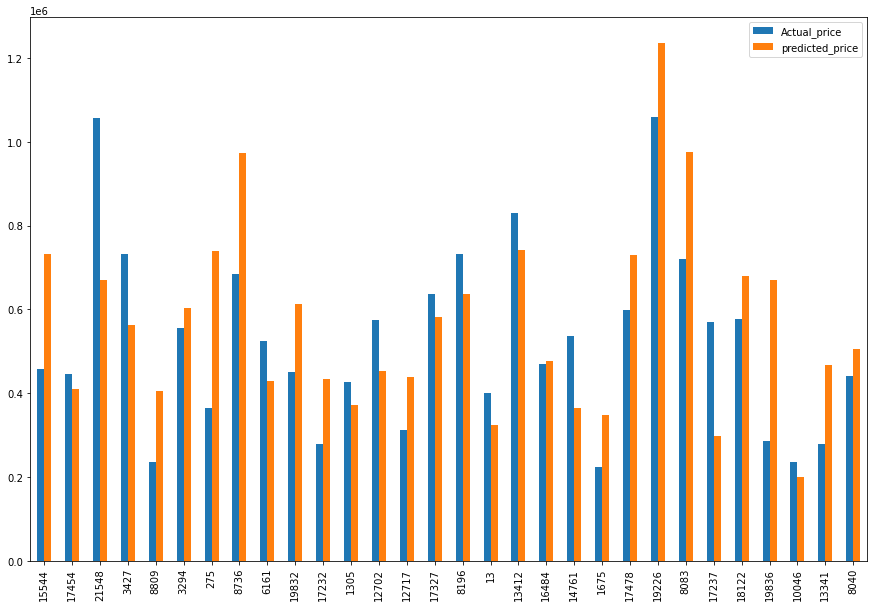

In [148]:
price.plot(kind="bar",figsize=(15,10)); # the bar graph the difference between actual and predicted price.

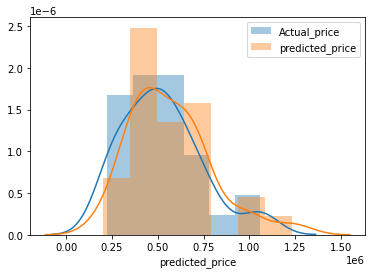

In [150]:
sns.distplot(price["Actual_price"])
sns.distplot(price["predicted_price"])
plt.legend(["Actual_price","predicted_price"])

### Mean square error 

In [135]:
from sklearn.metrics import mean_squared_error # it ll show how concentrated data values near the line.

In [136]:
Error = mean_squared_error(y_test,y_pred)

In [137]:
Error

82680872234.52504

# Assumption:

### 1.Linearity Assumption: 


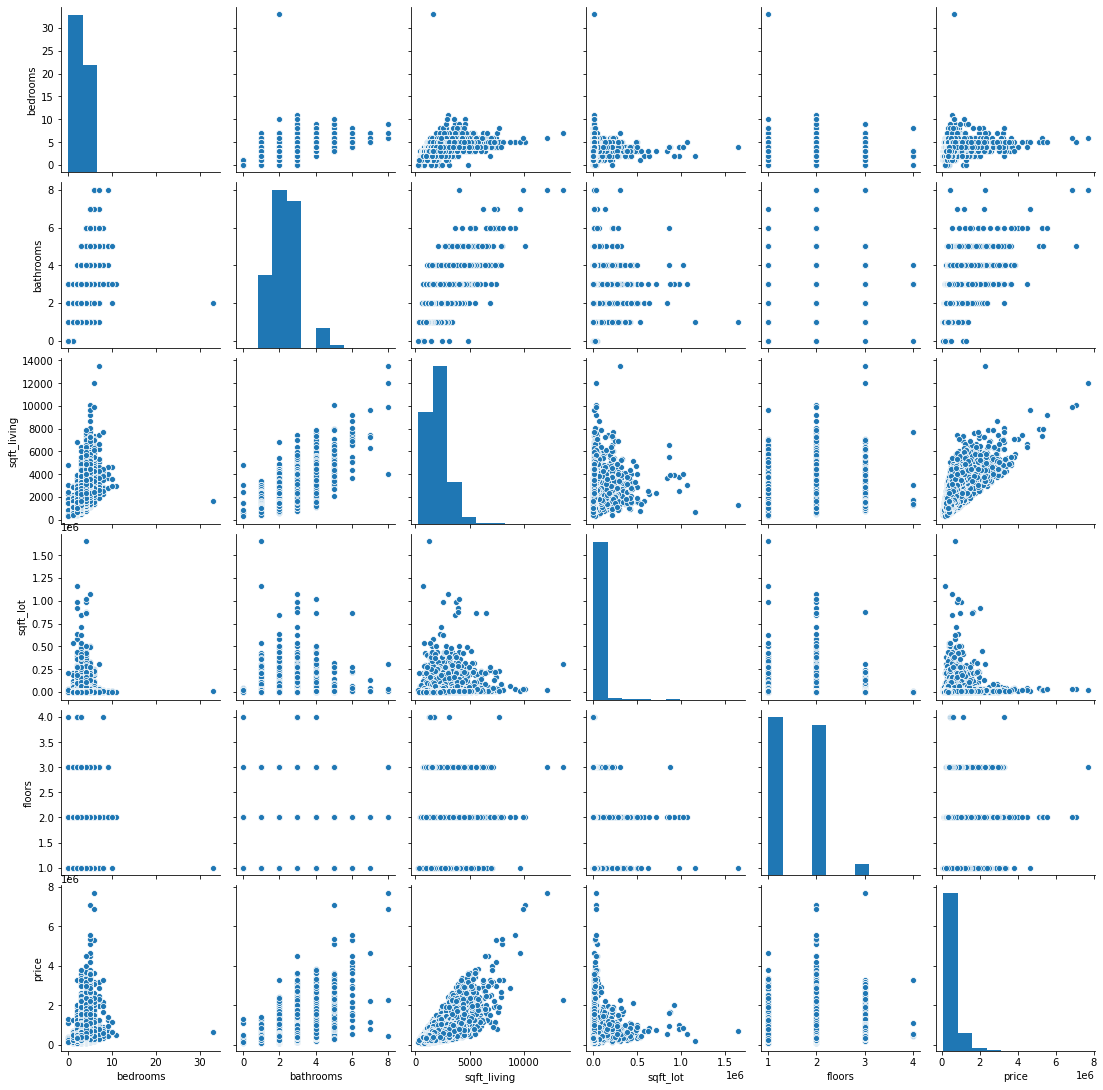

In [138]:
sns.pairplot(mydata)

### 2.Normality Assumption 

In [139]:
import scipy.stats as st 

((array([-3.59801667, -3.36038867, -3.22930113, ...,  3.22930113,
          3.36038867,  3.59801667]),
  array([-4221931.46193083, -4132071.6104107 , -4123216.48079273, ...,
           965453.51862481,  1002997.08966016,  1530206.98421065])),
 (249171.33518121368, -3865.5587791720936, 0.8659735742459718))

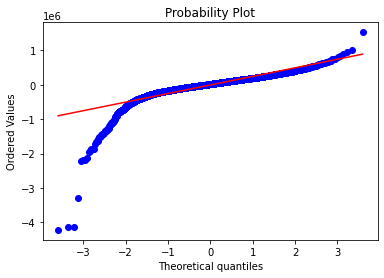

In [140]:
st.probplot(Res, dist="norm", plot = plt) # we ll check normality based on error. how close data values to the regression line.

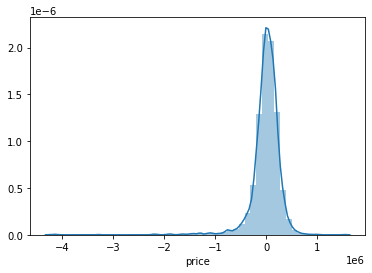

In [141]:
sns.distplot(Res)

## Conclusion:
    1.Thus we have strong correlation relationship between sqft_living and price.As sqft_living increases the price will increase. 
    2.The predicted value and actual value of price is almost equal. It will help to forcast the price of house in future.